# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Esther Awuzie

<br>

## Please show and display ALL your calculations and results.


In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext nb_black

<IPython.core.display.Javascript object>

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

In [2]:
def load_data(*, filename: str) -> pd.DataFrame:
    df = pd.read_csv(filename)
    print(f"Shape of data: {df.shape}\n")
    return df

<IPython.core.display.Javascript object>

In [3]:
df = load_data(filename="Ulta Skincare Reviews.csv")
df.head(2)

Shape of data: (4150, 10)



,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


<IPython.core.display.Javascript object>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4147 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


<IPython.core.display.Javascript object>

In [5]:
df.describe()

,Review_Upvotes,Review_Downvotes
count,4150.000000,4150.000000
mean,0.591325,0.161205
std,2.210041,0.912561
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,84.000000,35.000000


<IPython.core.display.Javascript object>

In [6]:
df.dtypes

Review_Title        object
Review_Text         object
Verified_Buyer      object
Review_Date         object
Review_Location     object
Review_Upvotes       int64
Review_Downvotes     int64
Product             object
Brand               object
Scrape_Date         object
dtype: object

<IPython.core.display.Javascript object>

In [7]:
df.isnull().sum()

Review_Title        0
Review_Text         3
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
df.duplicated().sum()

456

<IPython.core.display.Javascript object>

### Dropping Duplicates

In [9]:
df = df.dropna().drop_duplicates()

<IPython.core.display.Javascript object>

In [10]:
df.shape

(3690, 10)

<IPython.core.display.Javascript object>



### Dropping Columns

In [11]:
df = df.drop(columns=["Scrape_Date", "Review_Date", "Review_Title"])

<IPython.core.display.Javascript object>

#### I dropped these columns cause I don't think I'd be using them. Atleast for now.

In [12]:
df.head(3)

,Review_Text,Verified_Buyer,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand
0,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica
1,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica
2,Enjoy this product so much ! I look forward to using it - really feels great.,No,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica


<IPython.core.display.Javascript object>

### Replacing missing values

#### From the "df.isnull().sum()" we have missing values in Review_Text and Review_Location. I'd be replacing them by the mode.

In [13]:
df["Review_Location"] = df["Review_Location"].fillna(df["Review_Location"].mode()[0])

<IPython.core.display.Javascript object>

In [14]:
df["Review_Text"] = df["Review_Text"].fillna(df["Review_Text"].mode()[0])

<IPython.core.display.Javascript object>

In [15]:
# confirm

df.isna().sum()

Review_Text         0
Verified_Buyer      0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
dtype: int64

<IPython.core.display.Javascript object>

In [16]:
df["Verified_Buyer"].value_counts(normalize=100)

Verified_Buyer
No     0.664499
Yes    0.335501
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

66% of the buyers are unverified and 34% are verified. I don't know if this means anything to the company. Does it mean that those who aren't verified buyers are not their consistent customers. I can't say, but I can assume so.

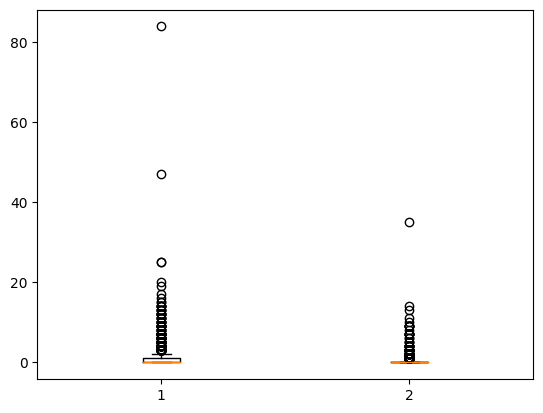

<IPython.core.display.Javascript object>

In [17]:
plt.boxplot([df["Review_Upvotes"], df["Review_Downvotes"]])
plt.show()

We have outliers! Especially in the Review_upvotes. I don't think I'd remove it cause it's possible that someone actually upvoted 84 times in total.


In [18]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Model evaluation
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    log_loss,
    precision_score,
    recall_score,
    auc,
    RocCurveDisplay,
)

<IPython.core.display.Javascript object>

##### Next is to create a function to clean and tokenize the reviews and perform the sentiment analysis

In [19]:
# Initialize NLTK objects
sia = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

<IPython.core.display.Javascript object>

In [20]:
# Define preprocessing and sentiment analysis function
def preprocess_and_get_sentiment(text):
    # Convert text to lowercase and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenize and lemmatize words, and remove stop words
    tokens = word_tokenize(text)
    tokens = [
        lemmatizer.lemmatize(token) for token in tokens if token not in stop_words
    ]
    preprocessed_text = " ".join(tokens)

    # Get the sentiment score for the preprocessed text
    sentiment_score = sia.polarity_scores(preprocessed_text)

    # Classify sentiment as positive or negative based on the compound score
    if sentiment_score["compound"] >= 0:
        sentiment = "positive"
    else:
        sentiment = "negative"

    return preprocessed_text, sentiment

<IPython.core.display.Javascript object>

In [21]:
# Apply the preprocessing function to each review in the dataset
df["Reviewed"], df["sentiment"] = zip(
    *df["Review_Text"].apply(preprocess_and_get_sentiment)
)

<IPython.core.display.Javascript object>

In [22]:
df[["Review_Text", "Reviewed", "sentiment"]].head(120)

,Review_Text,Reviewed,sentiment
0,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,love using face shower heat give light scrub nicely,positive
1,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,even better daily microfoliant im obsessed skin much smoother,positive
2,Enjoy this product so much ! I look forward to using it - really feels great.,enjoy product much look forward using really feel great,positive
3,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,ive never tried anything like love apply face get little shot warm feel good scrub seems gritty side effect ive encountered positive one,positive
4,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",exfoliates nicely give smooth skin irritation reaction skin highly recommended buy,positive
5,"Love that you can use it wet and dry, you can control how abrasive it is. Leaves your face soft and drenched in vitamins.",love use wet dry control abrasive leaf face soft drenched vitamin,positive
6,Absolutely love,absolutely love,positive
7,"I truly like the multivitamin thermafoliant product, which I have been using for the last 7 years. I'm very happy to purchase directly since it's no longer available from the Ulta store.",truly like multivitamin thermafoliant product using last year im happy purchase directly since longer available ulta store,positive
8,Definitely love it! My skin face feels better after using it.,definitely love skin face feel better using,positive
9,Excelent,excelent,positive


<IPython.core.display.Javascript object>

In [23]:
df["sentiment"].value_counts()

sentiment
positive    3466
negative     224
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [24]:
grouped_data = df.groupby("Product")
means = grouped_data["Review_Upvotes"].sum()
means

Product
Daily Microfoliant             1176
Daily Superfoliant              920
Hydro Masque Exfoliant           36
Multi-Vitamin Thermafoliant     318
Name: Review_Upvotes, dtype: int64

<IPython.core.display.Javascript object>

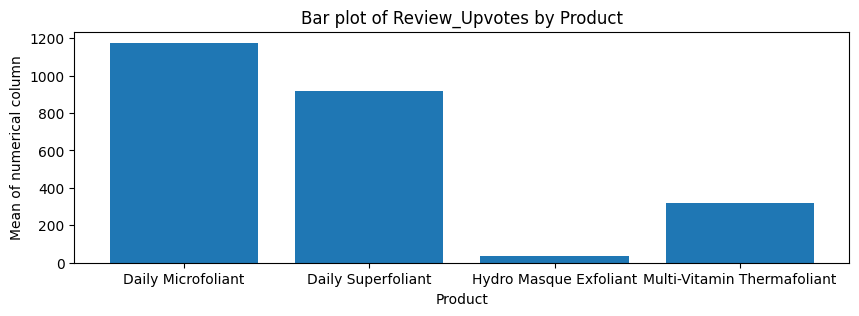

<IPython.core.display.Javascript object>

In [25]:
grouped_data = df.groupby("Product")
means = grouped_data["Review_Upvotes"].sum()
plt.figure(figsize=(10, 3))
plt.bar(means.index, means.values)
plt.xlabel("Product")
plt.ylabel("Mean of numerical column")
plt.title("Bar plot of Review_Upvotes by Product")
plt.show()

In [26]:
grouped_data = df.groupby("Product")
means = grouped_data["Review_Downvotes"].sum()
means

Product
Daily Microfoliant             330
Daily Superfoliant             169
Hydro Masque Exfoliant           9
Multi-Vitamin Thermafoliant    157
Name: Review_Downvotes, dtype: int64

<IPython.core.display.Javascript object>

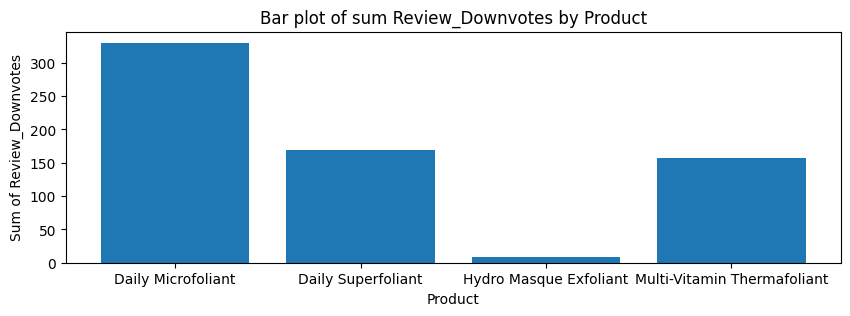

<IPython.core.display.Javascript object>

In [27]:
grouped_data = df.groupby("Product")
sum_ = grouped_data["Review_Downvotes"].sum()
plt.figure(figsize=(10, 3))
plt.bar(sum_.index, sum_.values)
plt.xlabel("Product")
plt.ylabel("Sum of Review_Downvotes")
plt.title("Bar plot of sum Review_Downvotes by Product")
plt.show()

<Axes: xlabel='Product'>

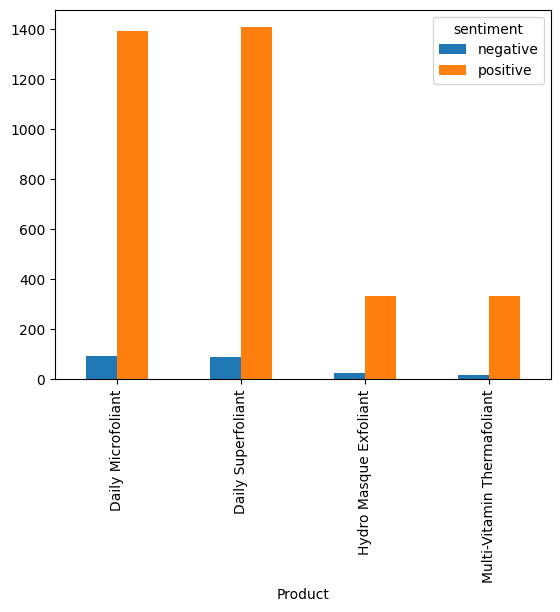

<IPython.core.display.Javascript object>

In [28]:
grouped_data = df.groupby(["Product", "sentiment"])
counts = grouped_data.size()
counts.unstack().plot(kind="bar")

<Axes: xlabel='Verified_Buyer'>

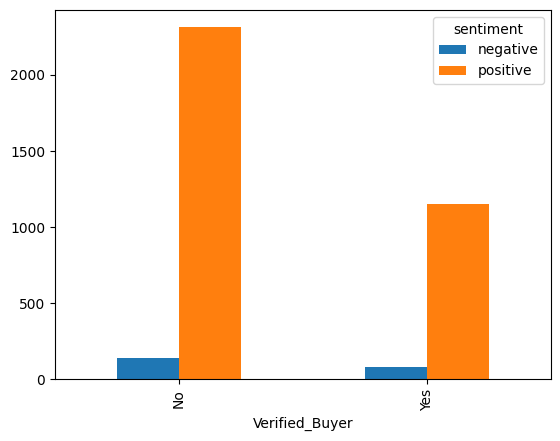

<IPython.core.display.Javascript object>

In [29]:
grouped_data = df.groupby(["Verified_Buyer", "sentiment"])
counts = grouped_data.size()
counts.unstack().plot(kind="bar")

In [30]:
df["Product"].value_counts()

Product
Daily Superfoliant             1495
Daily Microfoliant             1485
Hydro Masque Exfoliant          360
Multi-Vitamin Thermafoliant     350
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
grouped_data = df.groupby(["Product", "sentiment"])
counts = grouped_data.size()
counts

Product                      sentiment
Daily Microfoliant           negative       92
                             positive     1393
Daily Superfoliant           negative       88
                             positive     1407
Hydro Masque Exfoliant       negative       26
                             positive      334
Multi-Vitamin Thermafoliant  negative       18
                             positive      332
dtype: int64

<IPython.core.display.Javascript object>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


The reviews tell us that the most product bought are Daily Superfoilant and Daily Microfoliant respectively. 
Also with highest negative reviews. 

Daily Microfoliant has the highest upvotes.

Multivitamin Thermafoliant has the lowest negative reviews but it could also because it's the product with the lowest sale. 

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

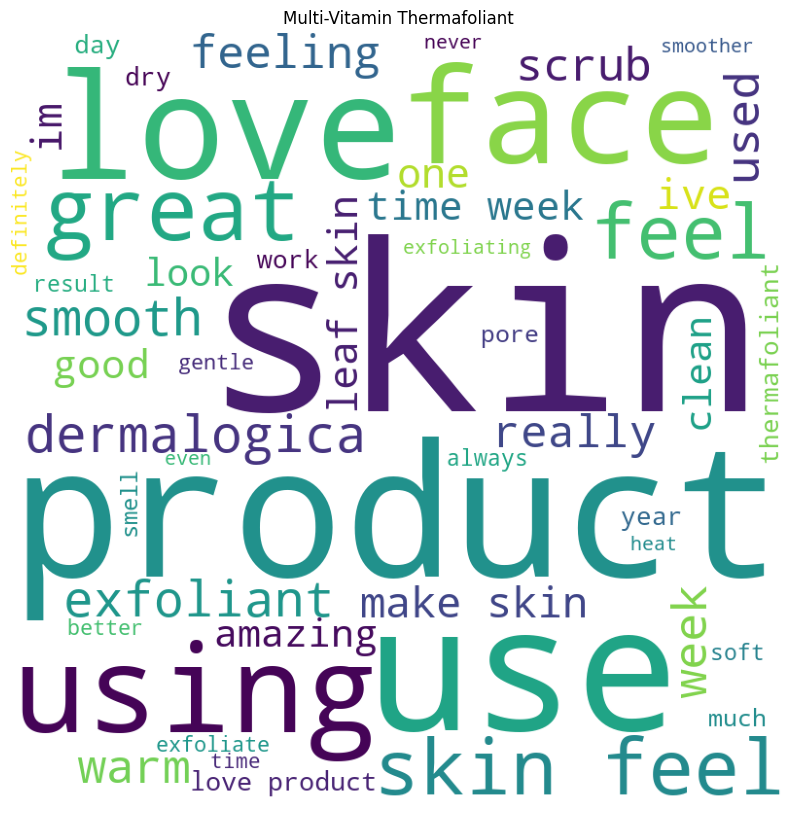

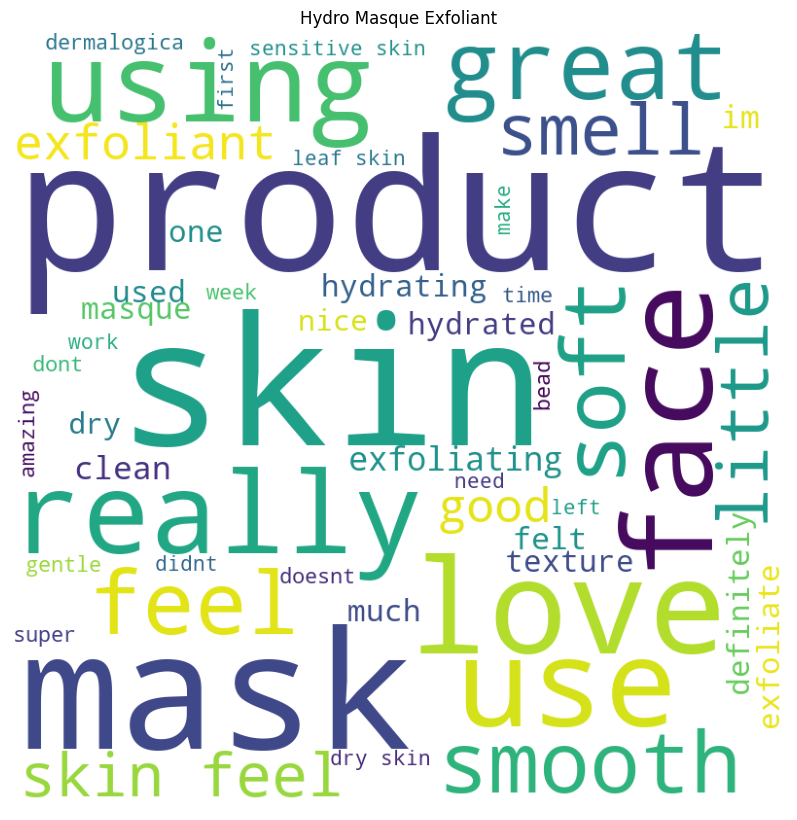

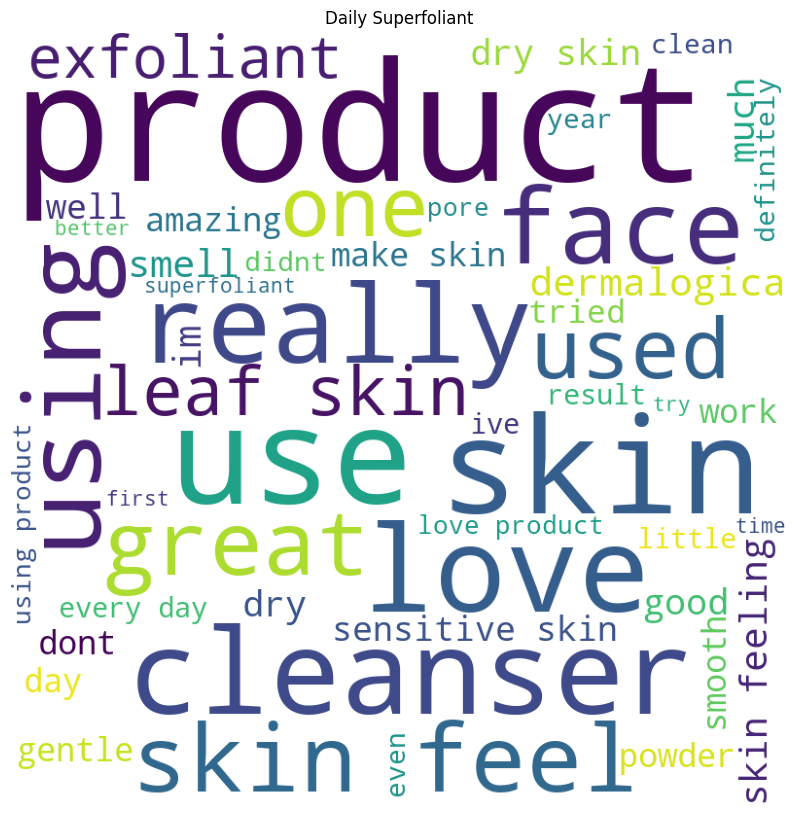

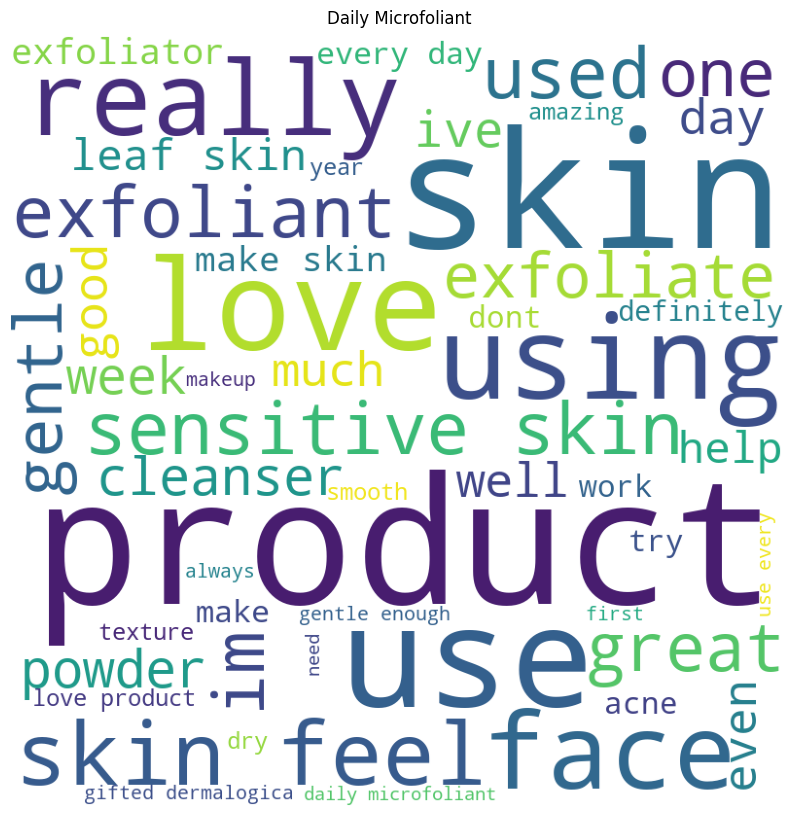

<IPython.core.display.Javascript object>

In [32]:
for product in df["Product"].unique():
    product_df = df[df["Product"] == product]
    text = " ".join(product_df["Reviewed"].tolist())

    wordcloud = WordCloud(
        background_color="white", width=800, height=800, max_words=50
    ).generate(text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(product)
    plt.tight_layout(pad=0)
    plt.savefig(f"{product}_worldcloud.png")

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [33]:
# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df["Review_Text"], df["sentiment"], test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [34]:
# Get the vectorizer to transform the text variable/ feature to a token of matrix
vectorizer = CountVectorizer(analyzer=preprocess_and_get_sentiment).fit_transform(
    df["Review_Text"]
)

<IPython.core.display.Javascript object>

In [35]:
X = vectorizer
y = df["sentiment"]

<IPython.core.display.Javascript object>

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

<IPython.core.display.Javascript object>

In [37]:
# Instantiate the fit the model on train dataset
model_clf = MultinomialNB().fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [38]:
# Evaluate the model on the testing data
predictions = model_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


<IPython.core.display.Javascript object>

In [39]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predictions)
conf_matrix

array([[ 40,   0],
       [  0, 698]], dtype=int64)

<IPython.core.display.Javascript object>

In [40]:
y_test.value_counts()

sentiment
positive    698
negative     40
Name: count, dtype: int64

<IPython.core.display.Javascript object>

##### Overall, the confusion matrix shows that the model has made very accurate predictions, with no false positives or false negatives. The model correctly predicted all 738 instances in the dataset, resulting in a perfect accuracy score of 100%

In [41]:
clf_report = classification_report(y_test, predictions)
print(clf_report)

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        40
    positive       1.00      1.00      1.00       698

    accuracy                           1.00       738
   macro avg       1.00      1.00      1.00       738
weighted avg       1.00      1.00      1.00       738



<IPython.core.display.Javascript object>

##### It is possible that the model has overfit to the training data. Therefore, it is important to evaluate the model using additional techniques, such as cross-validation, to get a more comprehensive understanding of its performance.

In [42]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Perform 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=10)

# Calculate the average accuracy score
avg_score = np.mean(scores)

print("Cross-validation accuracy:", avg_score)


Cross-validation accuracy: 1.0


<IPython.core.display.Javascript object>

##### I want to try adjusting the hyperparameters of the model using the grid search technique

In [43]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Define the hyperparameters you want to try
params = {
    "max_depth": [1, 2, 3, 4],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Define the GridSearchCV object
grid_search = GridSearchCV(clf, params, cv=5, scoring="accuracy")

# Train the model on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best score:", best_score)


Best hyperparameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 1.0


<IPython.core.display.Javascript object>

##### Trying to train my final model with the best hyperparameters and evaluate its performance on the test data.

In [44]:
clf = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1, min_samples_split=2)

<IPython.core.display.Javascript object>

In [45]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

<IPython.core.display.Javascript object>

In [46]:
y_pred = clf.predict(X_test)

<IPython.core.display.Javascript object>

##### This will give me an estimate of how well my model will perform on new, unseen data.

In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

<IPython.core.display.Javascript object>